In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon

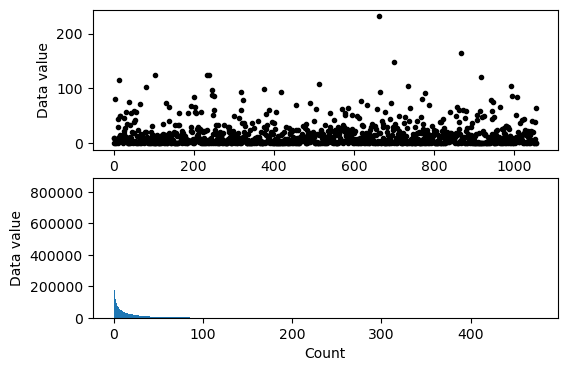

In [7]:
popN = int(1e7)

population = (4*np.random.randn(popN))**2

popMean = np.mean(population)

fig,ax = plt.subplots(2,1,figsize=(6,4))

ax[0].plot(population[::9475],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Data value')

plt.show()

In [9]:
samplesize = 40
confidence = 95

randSamples = np.random.randint(0,popN,samplesize)
sampledata = population[randSamples]
samplemean = np.mean(population[randSamples])
samplestd = np.std(population[randSamples],ddof=1)

numBoots = 1000
bootmeans = np.zeros(numBoots)

for booti in range(numBoots):
    bootmeans[booti] = np.mean(np.random.choice(sampledata,samplesize))
    
confint = [0,0]
confint[0] = np.percentile(bootmeans,(100-confidence)/2)
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2)

In [10]:
np.random.choice([1,2,3,4,5],5)

array([4, 1, 5, 5, 2])

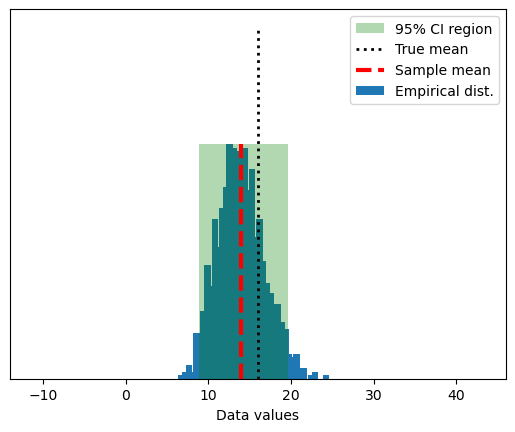

In [18]:
fig,ax = plt.subplots(1,1)

y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

ax.plot([popMean,popMean],[0,1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0,1],'r--',linewidth=3)
ax.set_xlim([popMean-30,popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence, 'True mean','Sample mean','Empirical dist.'))
plt.show()

In [19]:
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Empirical: %g - %g'%(confint2[0],confint2[1]))

Empirical: 8.92863 - 19.6949
Empirical: 8.48969 - 19.4401
